# Download Data

In this script, I load and evaluate data. I don't actually download it here, as I downloaded the data for a prior project and already had it on my computer.

Data:
- Model: ERA5 Reanalysis
- Temporal Resolution: Monthly resolution
- Temporal Extent: Jan 1940 - Dec 2023
- Spatial Resolution: 0.25 degree grid
- Spatial Extent: Global
- Fields: MSLP, Surface Pressure, and SST
Access: Data downloaded through Copernicus Climate Data Score using the CDS online download tool at https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download

## Set up

Set Filepaths
Import packages



In [1]:
# set filepaths
path_to_raw = '../data/raw/'

# import packages - general
import numpy as np
import pandas as pd

# import packages - geospatial
import xarray as xr

# import packages - plotting
import matplotlib.pyplot as plt

# Read in data

In [2]:
# set datafiles
datafiles = ['era5_mslp_sst.nc', 'era5_sp_sst.nc']

# read in datafiles, combine into one dataset
for i in range(len(datafiles)):
    print("Loading datafile: ", datafiles[i])

    if i==0:
        ds = xr.open_dataset(path_to_raw + datafiles[i])
        #print(ds.head())
    else:
        ds2 = xr.open_dataset(path_to_raw + datafiles[i])
        print("Merging into main ds")
        ds = xr.merge([ds, ds2])
        #print(ds2.head())

print(ds.head())


Loading datafile:  era5_mslp_sst.nc
Loading datafile:  era5_sp_sst.nc
Merging into main ds
<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1940-05-01
Data variables:
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 271.5 271.5 ... 271.5 271.5
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-07 20:57:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


## Make some initial plots to check we have the data we expect
Plot SST, MSLP, and sp

My takeaways from these plots:
 - The SST data will need cleaning, as it seems to include lakes as well
 - Other datasets apear complete

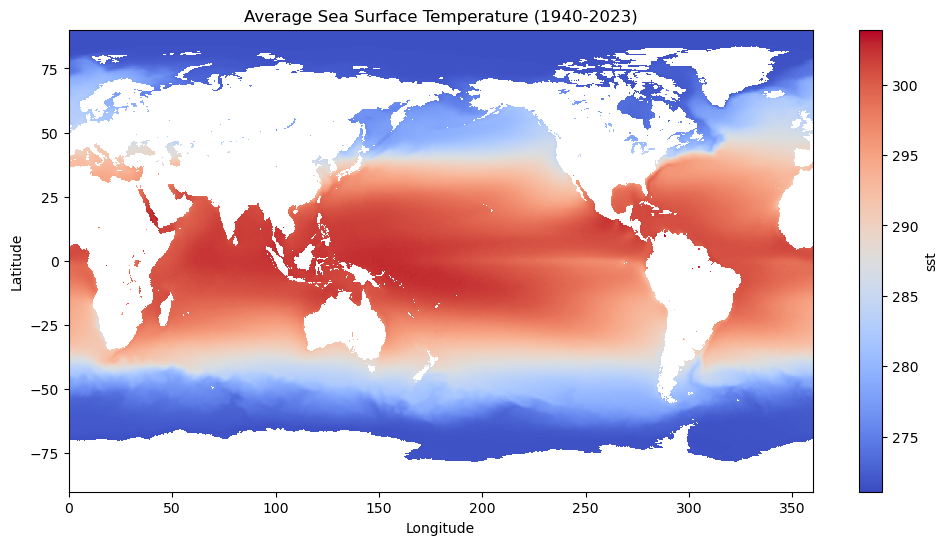

In [3]:

# Calculate the average SST over the entire time period
sst_mean = ds.sst.mean(dim='time')

# Plot the global map of the average SST
plt.figure(figsize=(12, 6))
sst_mean.plot(cmap='coolwarm')
plt.title('Average Sea Surface Temperature (1940-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

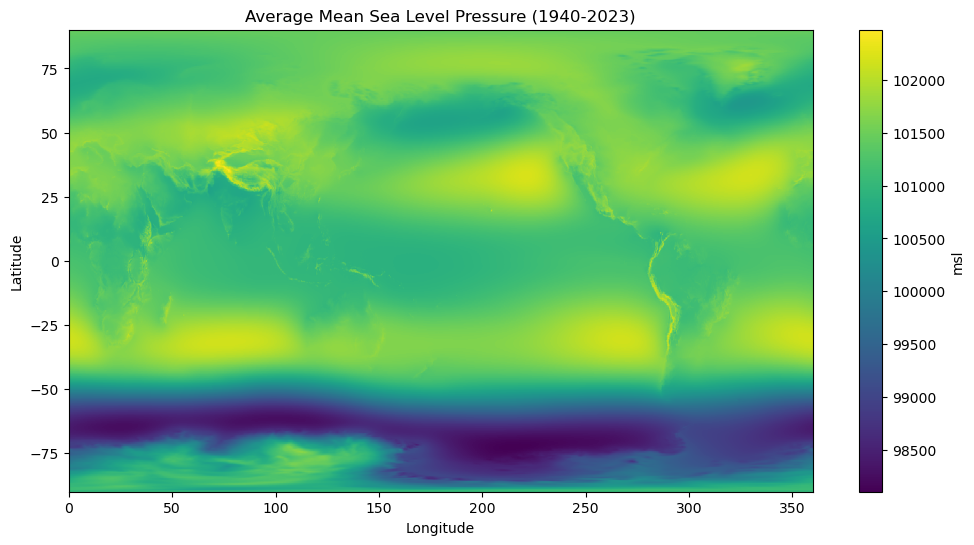

In [4]:
# Calculate the average MSL over the entire time period
msl_mean = ds.msl.mean(dim='time')

# Plot the global map of the average MSL
plt.figure(figsize=(12, 6))
msl_mean.plot(cmap='viridis')
plt.title('Average Mean Sea Level Pressure (1940-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

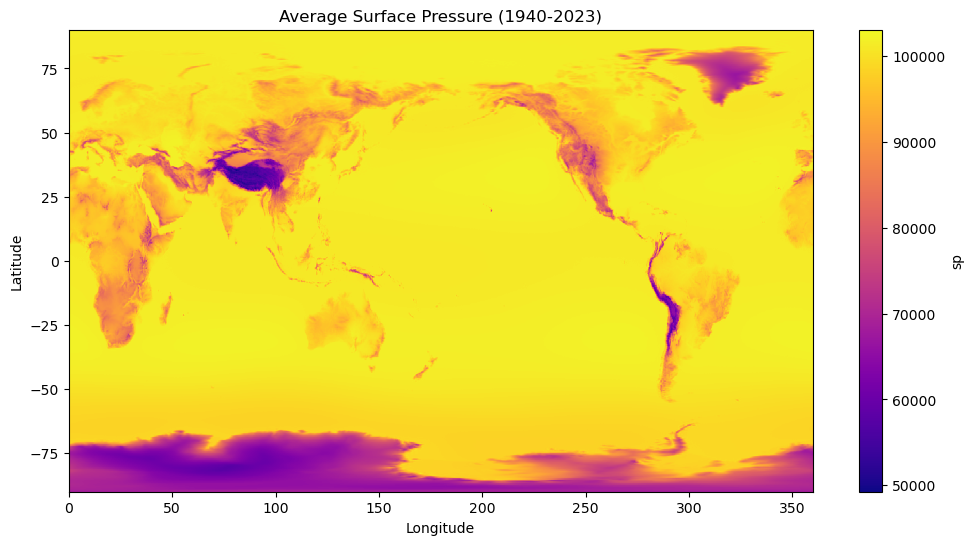

In [5]:
# Calculate the average surface pressure over the entire time period
sp_mean = ds.sp.mean(dim='time')

# Plot the global map of the average surface pressure
plt.figure(figsize=(12, 6))
sp_mean.plot(cmap='plasma')
plt.title('Average Surface Pressure (1940-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
# Calculate the average 500 hPa geopotential  over the entire time period
# We don't need this, and will have to drop it from the dataset in Clean_data.ipynb
z_mean = ds.z.mean(dim='time')

# Plot the global map of the average 500 hPa geopotential height
plt.figure(figsize=(12, 6))
z_mean.plot(cmap='terrain')
plt.title('Average 500 hPa Geopotential Height (1940-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

AttributeError: 'Dataset' object has no attribute 'z'

## Download land-sea mask (needed to clean SST dataset)

In theory, this should work. However, the CDS store is having issues accepting terms and conditions. I sent them a message and am waiting for a reply. Will continue working on this and update. For now, I implimented a workaround in my clean data script.

This same code, modified, will be used to add more temperature data once I work out CDS store issues.

In [12]:
import cdsapi

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": ["land_sea_mask"],
    "year": ["2022"],
    "month": ["01"],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2024-10-25 11:59:40,090 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-25 11:59:40,092 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative page](https://confluence.ecmwf.int/x/uINmFw) for guidance.
2024-10-25 11:59:40,092 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-10-25 11:59:40,093 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-10-25 11:59:40,093 WARNING [2024-06-16T

HTTPError: 403 Client Error: Forbidden for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels-monthly-means/execution
required licences not accepted
Not all the required licences have been accepted; please visit https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download#manage-licences to accept the required licence(s).